In [1]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
#import streamlit as st

In [2]:
# Title of the app
#st.title('Simple Streamlit App')

df1= pd.read_csv('C:/Users/User/Downloads/ecommerce_customer_data_large.csv')
df= pd.read_csv('C:/Users/User/Downloads/ecommerce_customer_data_custom_ratios.csv')

data= pd.concat([df,df1], axis=0)

df = pd.DataFrame(data)


In [3]:
# Check the dimensions of the dataset
print(df.shape)



(500000, 14)


In [4]:

# Inspect the first few records
print(df.head())


   Customer ID     Purchase Date Product Category  Product Price  Quantity  \
0        46251     9/8/2020 9:38      Electronics             12         3   
1        46251    3/5/2022 12:56             Home            468         4   
2        46251   5/23/2022 18:18             Home            288         2   
3        46251  11/12/2020 13:13         Clothing            196         1   
4        13593  11/27/2020 17:55             Home            449         1   

   Total Purchase Amount Payment Method  Customer Age  Returns  \
0                    740    Credit Card            37      0.0   
1                   2739         PayPal            37      0.0   
2                   3196         PayPal            37      0.0   
3                   3509         PayPal            37      0.0   
4                   3452    Credit Card            49      0.0   

         Customer Name  Age  Gender  Churn Item Purchased  
0  Christine Hernandez   37    Male      0         Blouse  
1  Christine H

In [5]:
# Identify missing values and data types
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500000 entries, 0 to 249999
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            500000 non-null  int64  
 1   Purchase Date          500000 non-null  object 
 2   Product Category       500000 non-null  object 
 3   Product Price          500000 non-null  int64  
 4   Quantity               500000 non-null  int64  
 5   Total Purchase Amount  500000 non-null  int64  
 6   Payment Method         500000 non-null  object 
 7   Customer Age           500000 non-null  int64  
 8   Returns                405022 non-null  float64
 9   Customer Name          500000 non-null  object 
 10  Age                    500000 non-null  int64  
 11  Gender                 500000 non-null  object 
 12  Churn                  500000 non-null  int64  
 13  Item Purchased         500000 non-null  object 
dtypes: float64(1), int64(7), object(6)
m

In [6]:
# Data Preprocessing
# Convert 'Purchase Date' to datetime


#Convert 'Purchase Date' to datetime using 24-hour format
df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], format='%d/%m/%Y %H:%M', errors='coerce')

# If the above fails, try the alternative format
if df['Purchase Date'].isnull().all():
    df['Purchase Date'] = pd.to_datetime(df['Purchase Date'], format='%m/%d/%Y %H:%M', errors='coerce')

# Convert 'Product Price' and 'Total Purchase Amount' to numeric
df['Product Price'] = pd.to_numeric(df['Product Price'], errors='coerce')
df['Total Purchase Amount'] = pd.to_numeric(df['Total Purchase Amount'], errors='coerce')

# Convert 'Product Price' and 'Total Purchase Amount' to numeric
df['Product Price'] = pd.to_numeric(df['Product Price'])
df['Total Purchase Amount'] = pd.to_numeric(df['Total Purchase Amount'])

# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())

# Remove duplicates if any
df.drop_duplicates(inplace=True)




Missing values:
Customer ID                   0
Purchase Date            150172
Product Category              0
Product Price                 0
Quantity                      0
Total Purchase Amount         0
Payment Method                0
Customer Age                  0
Returns                   94978
Customer Name                 0
Age                           0
Gender                        0
Churn                         0
Item Purchased                0
dtype: int64


In [7]:
print("\nBasic statistics of numerical columns:")
print(df.describe())


Basic statistics of numerical columns:
         Customer ID  Product Price       Quantity  Total Purchase Amount  \
count  500000.000000  500000.000000  500000.000000          500000.000000   
mean    25010.834166     254.701118       3.001916            2725.377964   
std     14420.386990     141.653230       1.414717            1442.753398   
min         1.000000      10.000000       1.000000             100.000000   
25%     12545.000000     132.000000       2.000000            1477.000000   
50%     25014.000000     255.000000       3.000000            2725.000000   
75%     37473.250000     377.000000       4.000000            3974.000000   
max     50000.000000     500.000000       5.000000            5350.000000   

        Customer Age        Returns            Age          Churn  
count  500000.000000  405022.000000  500000.000000  500000.000000  
mean       43.869402       0.499343      43.869402       0.200008  
std        15.357732       0.500000      15.357732       0.400

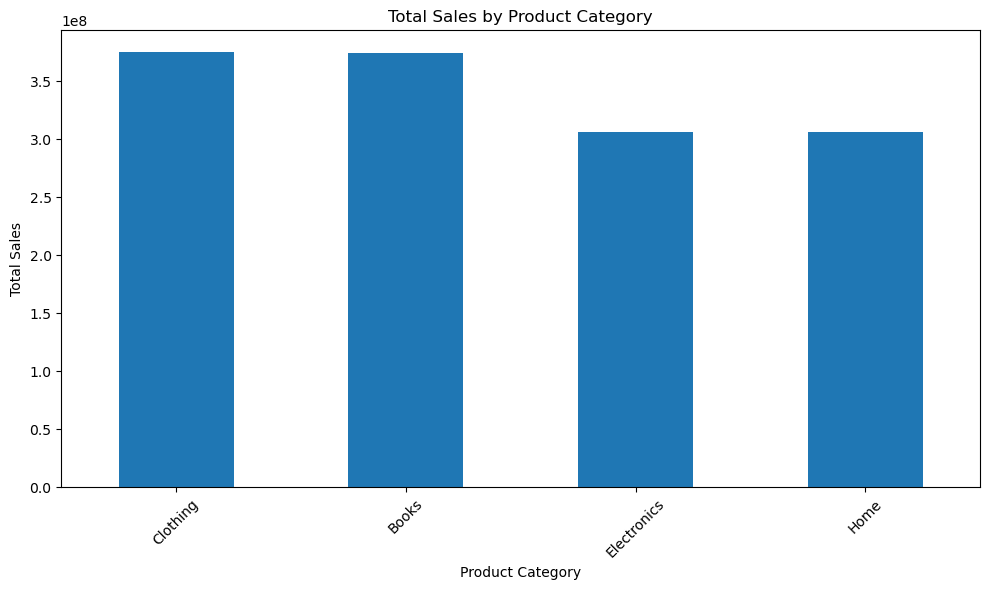

In [8]:
# Analyze sales by product category
category_sales = df.groupby('Product Category')['Total Purchase Amount'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
category_sales.plot(kind='bar')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

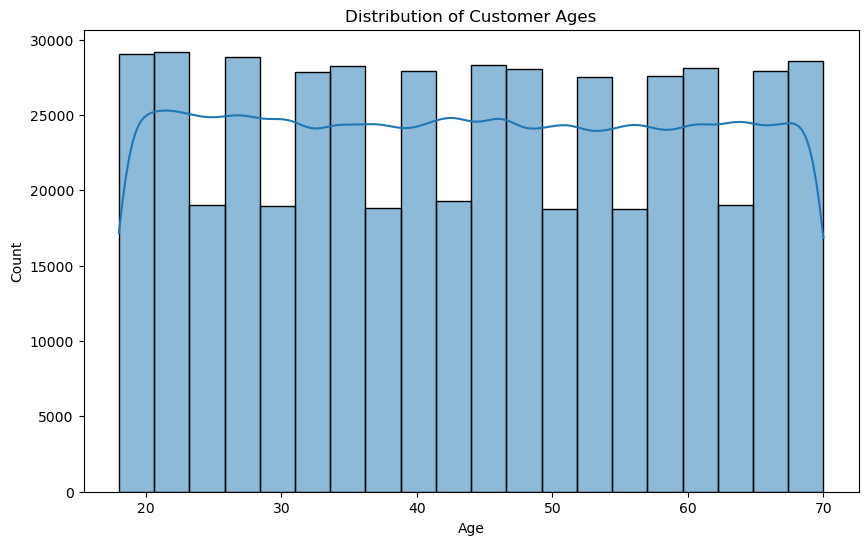

In [9]:
## Analyse customer by age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Customer Age'], bins=20, kde=True)
plt.title('Distribution of Customer Ages')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

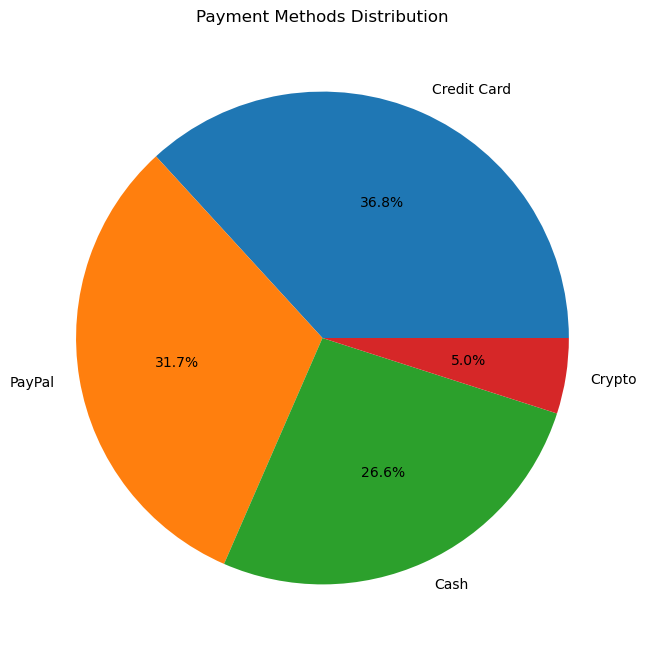

In [10]:
##Analyze payment methods:
payment_methods = df['Payment Method'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(payment_methods.values, labels=payment_methods.index, autopct='%1.1f%%')
plt.title('Payment Methods Distribution')
plt.show()

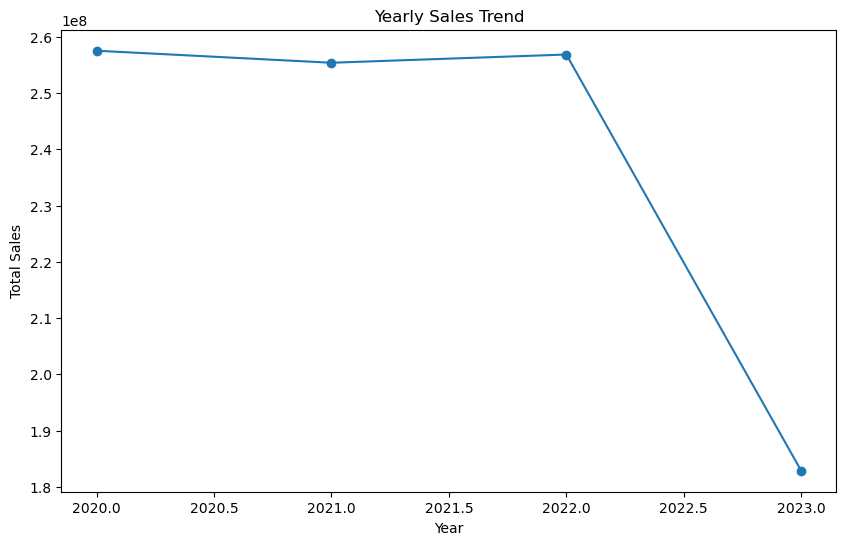

In [11]:
#Analyze sales trends over time:
df['Year'] = df['Purchase Date'].dt.year
yearly_sales = df.groupby('Year')['Total Purchase Amount'].sum()
plt.figure(figsize=(10, 6))
yearly_sales.plot(kind='line', marker='o')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.show()

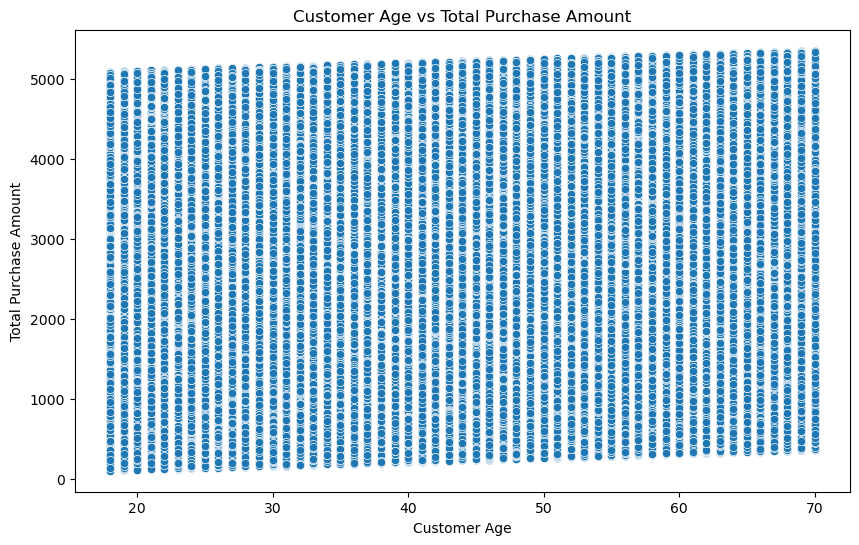

In [12]:
#Analyze the relationship between customer age and total purchase amount:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Customer Age', y='Total Purchase Amount', data=df)
plt.title('Customer Age vs Total Purchase Amount')
plt.xlabel('Customer Age')
plt.ylabel('Total Purchase Amount')
plt.show()

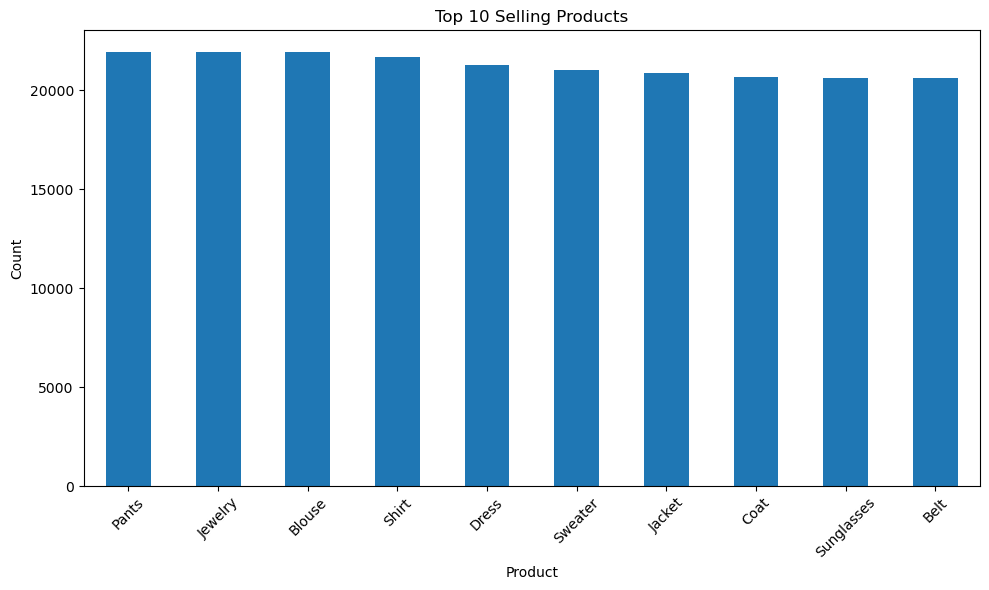

In [13]:
#Analyze the top-selling products:
top_products = df['Item Purchased'].value_counts().head(10)
plt.figure(figsize=(10, 6))
top_products.plot(kind='bar')
plt.title('Top 10 Selling Products')
plt.xlabel('Product')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

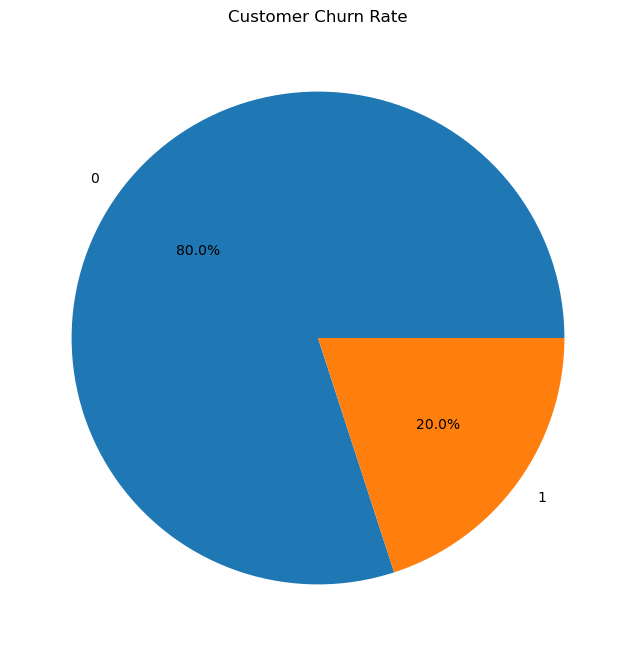

In [14]:
#Analyze customer churn:
churn_rate = df['Churn'].value_counts(normalize=True)
plt.figure(figsize=(8, 8))
plt.pie(churn_rate.values, labels=churn_rate.index, autopct='%1.1f%%')
plt.title('Customer Churn Rate')
plt.show()

In [15]:
# Create a user-item matrix
user_item_matrix = df.pivot_table(index= 'Customer ID', columns='Item Purchased', values='Quantity').fillna(0)
print("User-Item Matrix:")
print(user_item_matrix)

User-Item Matrix:
Item Purchased  Backpack  Belt  Blouse     Boots  Coat  Dress  Gloves  \
Customer ID                                                             
1                    0.0   0.0     0.0  5.000000   5.0    0.0     0.0   
2                    0.0   0.0     0.0  5.000000   0.0    0.0     1.0   
3                    0.0   0.0     5.0  0.000000   0.0    1.0     0.0   
4                    0.0   0.0     0.0  0.000000   0.0    0.0     5.0   
5                    0.0   0.0     0.0  3.333333   2.0    5.0     0.0   
...                  ...   ...     ...       ...   ...    ...     ...   
49996                2.0   5.0     3.0  0.000000   0.0    0.0     3.0   
49997                0.0   0.0     0.0  0.000000   0.0    0.0     1.0   
49998                2.0   0.0     0.0  0.000000   0.0    0.0     3.0   
49999                0.0   0.0     1.0  4.500000   1.0    3.0     0.0   
50000                0.0   0.0     0.0  3.000000   0.0    0.0     0.0   

Item Purchased  Handbag  Hat  Ho

In [16]:
# Compute cosine similarity between users
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

In [17]:
print("\nUser Similarity Matrix:")
print(user_similarity_df)


User Similarity Matrix:
Customer ID     1         2         3         4         5         6      \
Customer ID                                                               
1            1.000000  0.485071  0.125877  0.000000  0.271429  0.561951   
2            0.485071  1.000000  0.213708  0.267836  0.329155  0.533815   
3            0.125877  0.213708  1.000000  0.157543  0.143860  0.377263   
4            0.000000  0.267836  0.157543  1.000000  0.246105  0.341314   
5            0.271429  0.329155  0.143860  0.246105  1.000000  0.189993   
...               ...       ...       ...       ...       ...       ...   
49996        0.000000  0.241715  0.350467  0.303969  0.366104  0.204463   
49997        0.149813  0.175619  0.385542  0.336396  0.282504  0.341427   
49998        0.430528  0.324857  0.208746  0.501852  0.410027  0.416668   
49999        0.330463  0.517326  0.332782  0.318489  0.412006  0.270115   
50000        0.257663  0.328085  0.281093  0.476606  0.259503  0.530911   


In [18]:
def recommend_items(user_id, user_item_matrix, user_similarity_df, num_recommendations=3):
    # Get the similarity scores for the target user
    similarity_scores = user_similarity_df[user_id]
    
    # Multiply the ratings of other users by their similarity scores
    weighted_ratings = user_item_matrix.T.dot(similarity_scores)
    
    # Sum the similarity scores for normalization
    similarity_sums = np.sum(user_similarity_df[user_id])
    
    # Compute the predicted ratings
    predicted_ratings = weighted_ratings / similarity_sums
    
    # Exclude items already rated by the user
    user_ratings = user_item_matrix.loc[user_id]
    predicted_ratings = predicted_ratings[user_ratings == 0]
    
    # Get the top N recommendations
    recommendations = predicted_ratings.nlargest(num_recommendations)
    
    return recommendations

# Example: Get recommendations for user 1

#new_varnew_var = user_id = 2

In [19]:
user_id = input('Please give a user ID ')
user_id = int(user_id)


Please give a user ID 701


In [20]:

try:
    recommendations = recommend_items(user_id, user_item_matrix, user_similarity_df)
    print(f"Recommendations for user {user_id}:\n{recommendations}")
except KeyError as e:
    print(e)

Recommendations for user 701:
Item Purchased
Sweater       0.998642
Blouse        0.990001
Sunglasses    0.979757
dtype: float64


In [21]:
# Calculate RMSE and MAE
actual_values = user_similarity_df.iloc[user_id - 1, :].values  # Assuming user_id starts from 1
predicted_values = np.mean(user_similarity_df.values, axis=1)  # Assuming predictions are the mean similarity values

rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
mae = mean_absolute_error(actual_values, predicted_values)

print(f'RMSE: {rmse}')
print(f'MAE: {mae}')

RMSE: 0.14842382474772367
MAE: 0.11930090848140378
